# Introduction to Pandas

We are going to explore Pandas together. Pandas is a library used to treat tabular data in Python.

In [2]:
%matplotlib inline

import pandas as pd

There are two main data types in Pandas:
1. Series
2. Data Frames

Think of Series as a column, and Data Frames as tables.

Usually we will read in csv and excel data with Pandas. In this file though, we will declare Data Frames and Series from scratch to get a better understanding.

## Declaring Data Frames

In [3]:
df = pd.DataFrame({
    'a': [1, 2, 2],
    'b': [1, 1, 1],
    'x': [1, 2, 3],
})

df

,a,b,x
0,1,1,1
1,2,1,2
2,2,1,3


Checking in the data type using the type() function.

In [12]:
type(df)

pandas.core.frame.DataFrame

You can add a column on the fly. Syntactically, it looks like a list declaration. Ensure that you pass in the right count of values as a list.

In [16]:
df.insert(4, 'd', 'b')

In [17]:
df

,a,b,x,c,d
0,1,1,1,b,b
1,2,1,2,b,b
2,2,1,3,b,b


In [41]:
df["y"] = [3, 60, 6]
df

,a,b,x,c,d,y
0,1,1,1,b,b,3
1,2,1,2,b,b,60
2,2,1,3,b,b,6


Let's declare a Data Frame of food vs weight.

In [35]:
fridge = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
fridge

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


## Understanding Data Frames

To get the dimensions of our data frame:

In [19]:
df.shape

(3, 5)

Splicing works too, just like a list.

In [30]:
df[0:1]

,a,b,x,c,d
0,1,1,1,b,b


To see the names of all columns:

In [32]:
ex = list(df.columns.values)
ex

['a', 'b', 'x', 'c', 'd']

It's possible to extract a single column by passing the name like a index of a list.

In [33]:
ex[1]

'b'

Remember the data type of a single column is Series.

## Manipulating Data Frames 

Notice that there are some food that's the same? e.g. 2 bacons. Let's try to group all the food and add up the total weight.

In [38]:
fridge.groupby('food').sum()

,ounces
food,
Bacon,8.0
Pastrami,6.0
bacon,16.0
corned beef,7.5
honey ham,5.0
nova lox,6.0
pastrami,3.0
pulled pork,3.0


Notice that groupby() is actually case sensitive. Even though we want to group "Bacon" and "bacon" together. Let's start by fixing the names of the food by changing everything to lowercasing. We will assign that to a new variable.

In [47]:
fridge2 = fridge['food'].str.lower()

fridge2

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

This is a series data type. You can replace a series in data frame by using the = symbol. We will replace the food column now with the lowercased food names series.

In [49]:
fridge['food'] = fridge2

fridge

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Let's group by food again and calculate the total again.

In [51]:
sumation = fridge.groupby('food').sum()
sumation

,ounces
food,
bacon,24.0
corned beef,7.5
honey ham,5.0
nova lox,6.0
pastrami,9.0
pulled pork,3.0


Let's visualise the data.

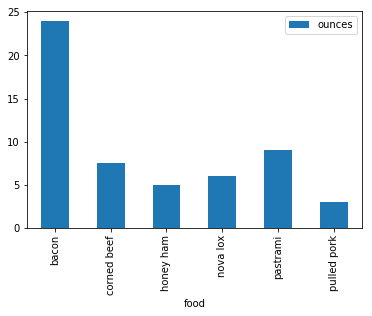

In [54]:
sumation.plot(kind="bar")

Next, let us try to create a new column in this data frame. We will try to add the animal type into the table, e.g. bacon is pig, so is honey ham. Corned beef is cow. etc.

First, let's create a dictionary of the food to animal mapping.

In [57]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "corned beef": "beef",
    "honey ham": "pig",
    "sashmi": "fish",
    "roast chicken": "chicken",
    "kuey png": "chicken",
    "egg": "chicken",
    "char siew": "pig",
    "nova lox": "fish",
    "pastrami": "beef"
}

We will use map() from a column/series. You can think of map() as a quick way of looping.

In [58]:
fridge["animal"] = fridge["food"].map(meat_to_animal)

fridge

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,beef
4,corned beef,7.5,beef
5,bacon,8.0,pig
6,pastrami,3.0,beef
7,honey ham,5.0,pig
8,nova lox,6.0,fish


Let's group the data frame by animal this time round. Notice that the sum() method skips the food column and doesn't add them.

In [59]:
fridge.groupby('animal').sum()

,ounces
animal,
beef,16.5
fish,6.0
pig,32.0


You can "transpose" data using Pandas T attribute. The simple way to understand this is that rows become columns and vice versa.

In [62]:
fridge.groupby('animal').sum().T

animal,beef,fish,pig
ounces,16.5,6.0,32.0


Let's visualise the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114111a20>]],
      dtype=object)

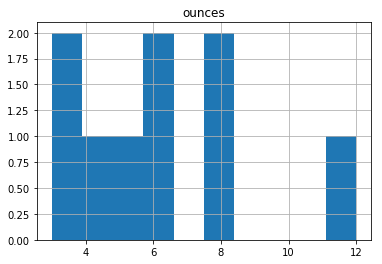

In [67]:
fridge.hist()

## Using iloc

The last thing to see here is using the iloc method in pandas to get data that you want. Let's declare a new data frame.

In [4]:
dataset = pd.DataFrame({
    '0': ["Row 1 Column 1", "Row 2 Column 1", "Row 3 Column 1", "Row 4 Column 1", "Row 5 Column 1", "Row 6 Column 1"],
    '1': ["Row 1 Column 2", "Row 2 Column 2", "Row 3 Column 2", "Row 4 Column 2", "Row 5 Column 2", "Row 6 Column 2"],
    '2': ["Row 1 Column 3", "Row 2 Column 3", "Row 3 Column 3", "Row 4 Column 3", "Row 5 Column 3", "Row 6 Column 3"],
    '3': ["Row 1 Column 4", "Row 2 Column 4", "Row 3 Column 4", "Row 4 Column 4", "Row 5 Column 4", "Row 6 Column 4"],
})

dataset

,0,1,2,3
0,Row 1 Column 1,Row 1 Column 2,Row 1 Column 3,Row 1 Column 4
1,Row 2 Column 1,Row 2 Column 2,Row 2 Column 3,Row 2 Column 4
2,Row 3 Column 1,Row 3 Column 2,Row 3 Column 3,Row 3 Column 4
3,Row 4 Column 1,Row 4 Column 2,Row 4 Column 3,Row 4 Column 4
4,Row 5 Column 1,Row 5 Column 2,Row 5 Column 3,Row 5 Column 4
5,Row 6 Column 1,Row 6 Column 2,Row 6 Column 3,Row 6 Column 4


To filter first 3 rows

To filter rows 1 to 4, columns 2 to 3

To filter specific row number and column number